<a href="https://colab.research.google.com/github/vishxm/ML-basic/blob/main/PredictionUsingUnsupervisedML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Machine Learning Prediction

## Made by [Vishwas Modhera](https://www.linkedin.com/in/vishwas-modhera-a9b292162/)

Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Importing the dataset

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)


Inspecting the dataset

In [ ]:
print(df.shape, "\n\n", df.head(), "\n\n", df.describe())

(150, 4) 

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2 

        sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
count         150.000000        150.000000         150.000000        150.000000
mean            5.843333          3.057333           3.758000          1.199333
std             0.828066          0.435866           1.765298          0.762238
min             4.300000          2.000000           1.000000          0.100000
25%             5.100000          2.800000           1.600000          0.300000
50%             5.800000          3.000000       

Let's do Unsupervised Learning now!

Importing KMeans from sklearn 

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
X = df.iloc[:,:4].values

In [ ]:
X.shape

(150, 4)

In [ ]:
inertia = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)


We have inertia for clusters ranging from 1 to 10. Let's plot them and find out what number of clusters work best for us using the elbow method.

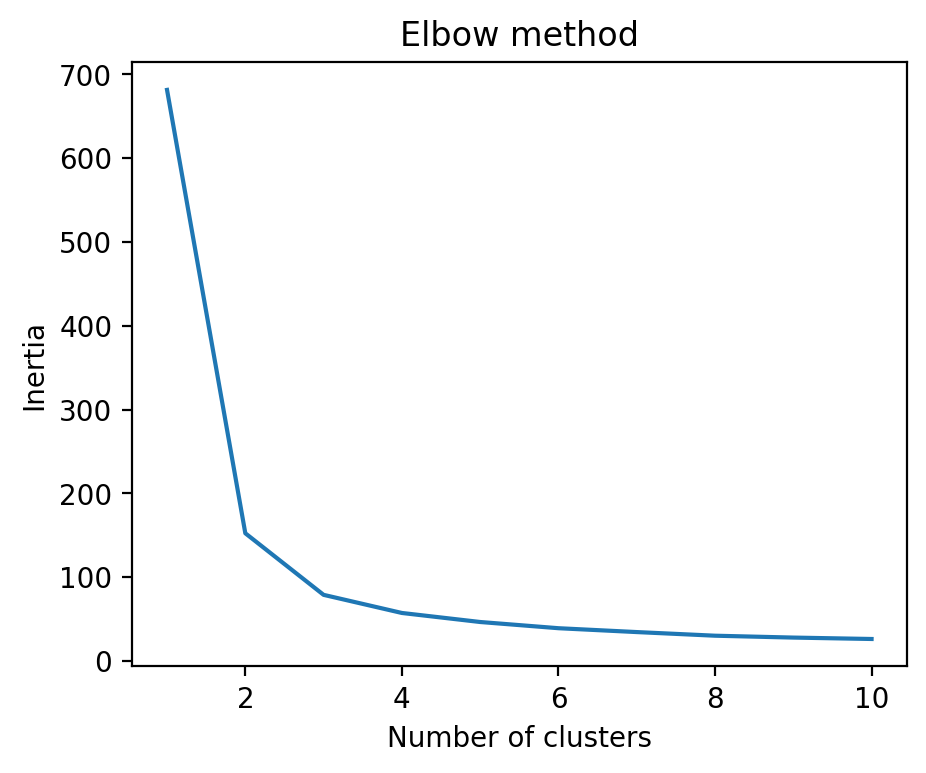

In [ ]:
plt.plot(np.arange(1,11), inertia)
plt.rcParams['figure.figsize'] = (5,4)
plt.rcParams['figure.dpi'] = 100
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

Choosing N = 3 for our KMeans clustering

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++')
y_kmeans = kmeans.fit_predict(X)

Visualising the clusters

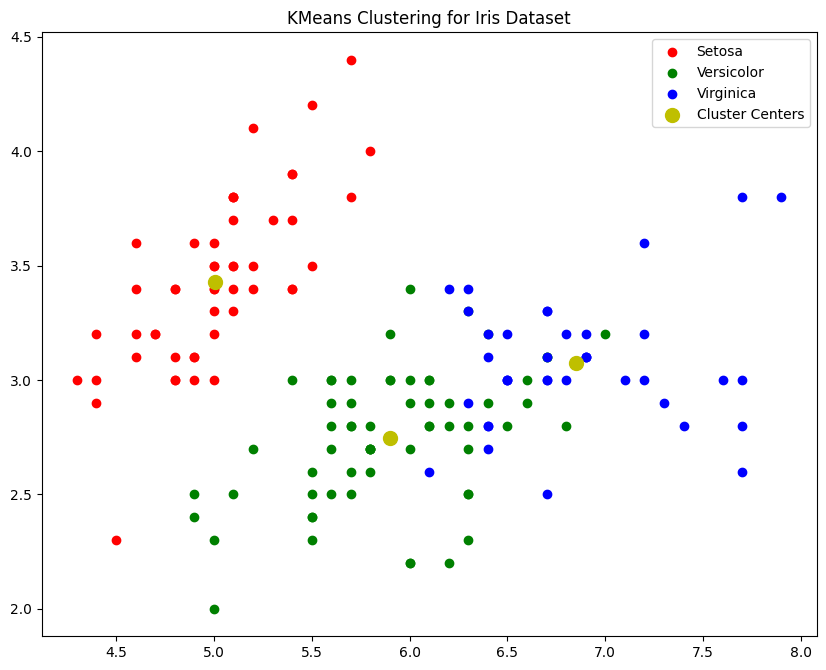

In [ ]:
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['figure.dpi'] = 100

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1], c='r', label='Setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1], c='g', label='Versicolor')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1], c='b', label='Virginica')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='y', s=100, label='Cluster Centers')
plt.title("KMeans Clustering for Iris Dataset")
plt.legend()
plt.show()

In [ ]:
y = iris.target

from sklearn import metrics
print('MSE : ', metrics.mean_squared_error(y_kmeans, y))

MSE :  0.10666666666666667


Let's do Agglomerative Clustering on the dataset

In [ ]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='ward')
y_ac = ac.fit_predict(X)

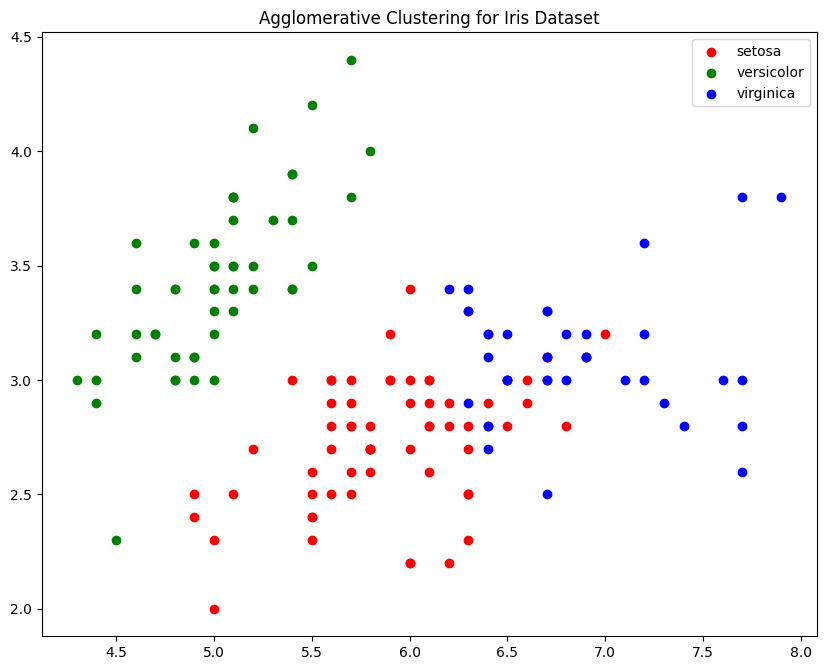

In [ ]:
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['figure.dpi'] = 100

plt.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='r', label='setosa')
plt.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='g', label='versicolor')
plt.scatter(X[y_ac == 2, 0], X[y_ac == 2, 1], c='b', label='virginica')

plt.title("Agglomerative Clustering for Iris Dataset")
plt.legend()
plt.show()

In [ ]:
print("MSE : ", metrics.mean_squared_error(y_ac, y))

MSE :  1.0666666666666667


We find that for this particular dataset, KMeans works better than Agglomerative (Heirarchical) clustering. Heirarchical works better when we want to make decisions about how coarsely or finely we want to group our data, or what resolution we want our data in.

KMeans is useful when we want to divide our data in the k sets simultaneously. It’s useful when data needs to be compared to each other and is “comparable”.